In [100]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

## A little statistics

1A)

1B) We'll try several Z values to see the relation between stats.norm.cdf() to z-score values.

In [101]:
print("cdf: " , stats.norm.cdf(1) , "Table Value: ", 0.84134)
print("cdf: " , stats.norm.cdf(-1) , "Table Value: ", 0.15866)
print("cdf: " , stats.norm.cdf(2) , "Table Value: ", 0.97725)

cdf:  0.8413447460685429 Table Value:  0.84134
cdf:  0.15865525393145707 Table Value:  0.15866
cdf:  0.9772498680518208 Table Value:  0.97725


As we can see, cdf does indeed give values consistent with the z-table.

1C) 

In [102]:
print("ppf: ", stats.norm.ppf(0.5), "Expected Output: ", 0)
print("ppf: ", stats.norm.ppf(0.84134), "Expected Output: ", 1)
print("ppf: ", stats.norm.ppf(0.977), "Expected Output: ", 2)
print("ppf: ", stats.norm.ppf(0.9999999), "Expected Output: ", 5)
print("ppf: ", stats.norm.ppf(0.15866), "Expected Output: ", -1)

ppf:  0.0 Expected Output:  0
ppf:  0.9999803859660787 Expected Output:  1
ppf:  1.9953933101678245 Expected Output:  2
ppf:  5.199337582290661 Expected Output:  5
ppf:  -0.9999803859660787 Expected Output:  -1


1D) Minus signs appear for any probability plugged into the ppf which is less than 0.5. This makes sense, as the ppf function outputs z-scores, which are the number of standard deviations away from the mean (ie. z-score is zero at the mean). Thus, if we plug in a probability which is one standard deviation less than the mean, we would expect ppf to output a z-score of -1.

2) I chose to investigate the exponential distribution.

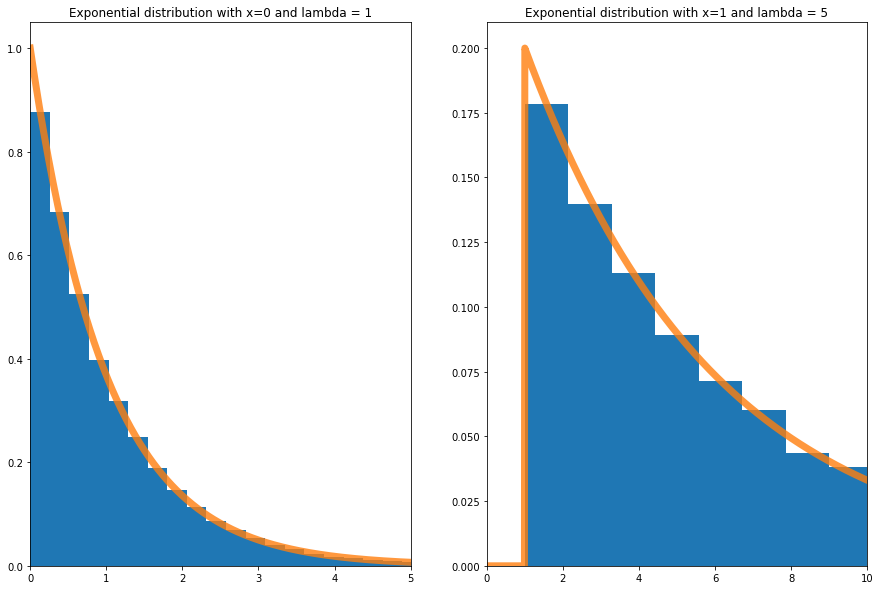

In [145]:
fig, (ax1, ax2) = plt.subplots(1,2)

exp_d1 = stats.expon.rvs(loc = 0, scale = 1, size = 100000)
exp_d2 = stats.expon.rvs(loc = 1, scale = 5, size = 10000)

ax1.hist(exp_d1,50, density=True)
ax2.hist(exp_d2,50, density=True)

x = np.linspace(0,10,1000)
x2 = np.linspace(0,10,1000)
ax1.plot(x, stats.expon.pdf(x), linewidth = 7, alpha = 0.8)
ax2.plot(x, stats.expon.pdf(x2, loc = 1, scale = 5), linewidth = 7, alpha = 0.8)

ax1.title.set_text('Exponential distribution with x=0 and lambda = 1')
ax2.title.set_text('Exponential distribution with x=1 and lambda = 5')

ax1.set_xlim([0,5])
ax2.set_xlim([0,10])
plt.show()

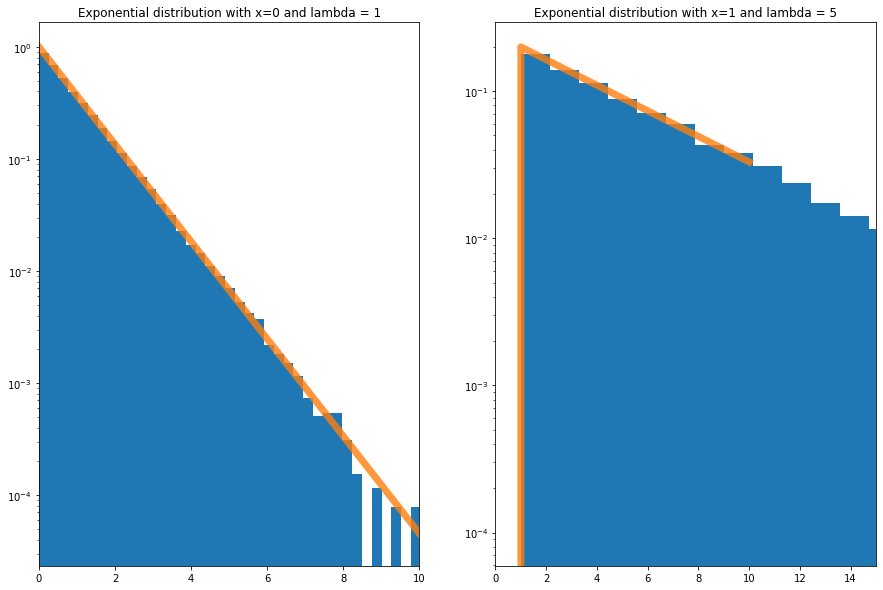

In [148]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(exp_d1,50, density = True)
ax2.hist(exp_d2,50, density = True)

ax1.semilogy(x, stats.expon.pdf(x), linewidth = 7, alpha = 0.8)
ax2.semilogy(x2, stats.expon.pdf(x2, loc = 1, scale = 5), linewidth = 7, alpha = 0.8)

ax1.set_xlim([0,10])
ax2.set_xlim([0,15])

ax1.title.set_text('Exponential distribution with x=0 and lambda = 1')
ax2.title.set_text('Exponential distribution with x=1 and lambda = 5')
plt.show()

3A) Suppose I record the number of days it takes between rainy days in Seattle in the spring, and find that it took five days between the last two rainy days.

3B) What is the probability that it takes 5 or fewer days before the next rainy day, assuming that on average one in three days are rainy during spring in Seattle?

3C) $\int_{0}^{5} 3e^{-3x}dx$

In [104]:
print("D) Probability that background produced signal: " , stats.expon.cdf(5, scale=3))
print("E) Z-score of above probability: ", stats.expon.ppf(stats.expon.cdf(5, scale=3)))

D) Probability that background produced signal:  0.8111243971624382
E) Z-score of above probability:  1.666666666666667


4) Suppose that we wanted to see how the lambda parameter (rate of rainy days) effects the liklihood of consecutive rainy days:

In [105]:
print("1: One in two days are rainy, two rainy days within 5 days of eachother " , stats.expon.cdf(5, scale=2))
print("2: One in six days are rainy, two rainy days within 5 days of eachother " , stats.expon.cdf(5, scale=6))
print("3: One in ten days are rainy, two rainy days within 5 days of eachother " , stats.expon.cdf(5, scale=10))
print("4: One in fifty days are rainy, two rainy days within 5 days of eachother " , stats.expon.cdf(5, scale=50))
print("5: One in two days are rainy, two consecutive rainy days " , stats.expon.cdf(1, scale=2))
print("6: One in six days are rainy, two consecutive rainy days " , stats.expon.cdf(1, scale=6))
print("7: One in ten days are rainy, two consecutive rainy days " , stats.expon.cdf(1, scale=10))

1: One in two days are rainy, two rainy days within 5 days of eachother  0.9179150013761012
2: One in six days are rainy, two rainy days within 5 days of eachother  0.5654017914929218
3: One in ten days are rainy, two rainy days within 5 days of eachother  0.3934693402873666
4: One in fifty days are rainy, two rainy days within 5 days of eachother  0.09516258196404044
5: One in two days are rainy, two consecutive rainy days  0.3934693402873666
6: One in six days are rainy, two consecutive rainy days  0.15351827510938593
7: One in ten days are rainy, two consecutive rainy days  0.09516258196404044


It seems that for an exponential function, the ratio between x and lambda determines the probability of an event. Take lines 4 and 7 or 3 and 5 as examples from above. In both cases, the ratio of x/lambda is identical, and the probabilities returned by the cdf are identical.

## Non-continuous distributions

1A) The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occuring in a fixed interval of time or space if these events occur with a known constant mean rate and are independent of the time since the last event. In essence, the Poisson distribution is a discrete version of the exponential distribution.

1B)

In [111]:
stats.poisson?

Signature:       stats.poisson(*args, **kwds)
Type:            poisson_gen
String form:     <scipy.stats._discrete_distns.poisson_gen object at 0x7f30c51b9c50>
File:            /opt/conda/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A Poisson discrete random variable.

As an instance of the `rv_discrete` class, `poisson` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(mu, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, mu, loc=0)
    Probability mass function.
logpmf(k, mu, loc=0)
    Log of the probability mass function.
cdf(k, mu, loc=0)
    Cumulative distribution function.
logcdf(k, mu, loc=0)
    Log of the cumulative distribution function.
sf(k, mu, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, mu, loc=0)
    Log of the survival function.
ppf

TypeError: pmf() missing 1 required positional argument: 'k'

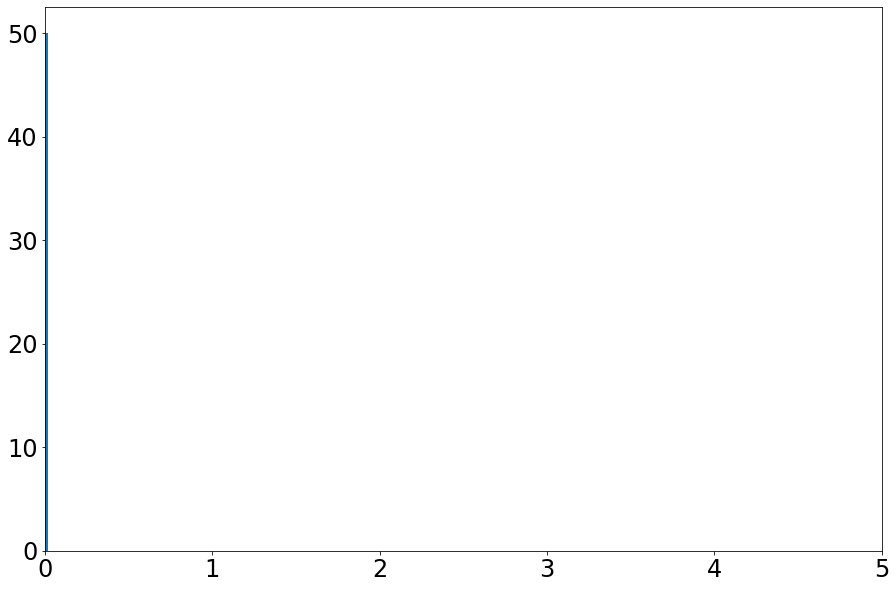

In [121]:
fig, ax = plt.subplots(1,1)
d = stats.poisson.rvs(mu = 0, size = 1000)
ax.hist(d,50, density=True)
plt.tick_params(labelsize=24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.poisson.pmf(mu = x), linewidth = 8, alpha = 0.7)
plt.show()

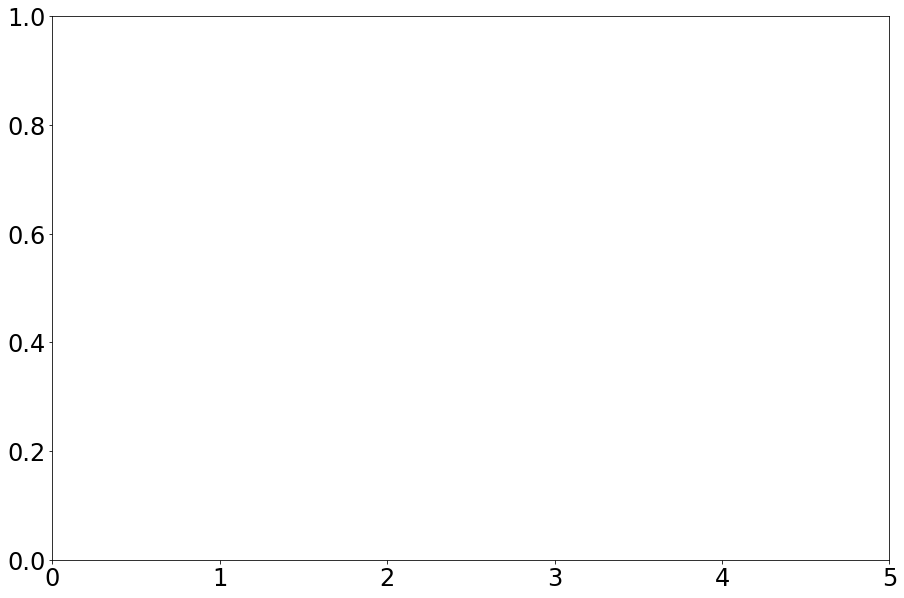

In [109]:
#fig, ax = plt.subplots(2,2)
d = stats.expon.rvs(loc = 0., scale = 1, size = 100000)
ax.hist(d,50, density=True)
plt.tick_params(labelsize=24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.expon.pdf(x, loc=0., scale = 1), linewidth = 8, alpha = 0.7)
plt.show()